In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024'

In [3]:
df_insurance_checked = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_checked.csv'), index_col = False)

In [5]:
df_insurance_checked.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df_insurance_checked.shape

(1337, 8)

In [8]:
df_insurance_checked.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

# 02 Creating Matrix Heatmap

In [19]:
# Dropping unneeded columns and creating data subset
insurance_sub = df_insurance_checked.drop(['Unnamed: 0', 'region', 'sex','smoker'], axis = 1)

In [20]:
insurance_sub.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [21]:
insurance_sub.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


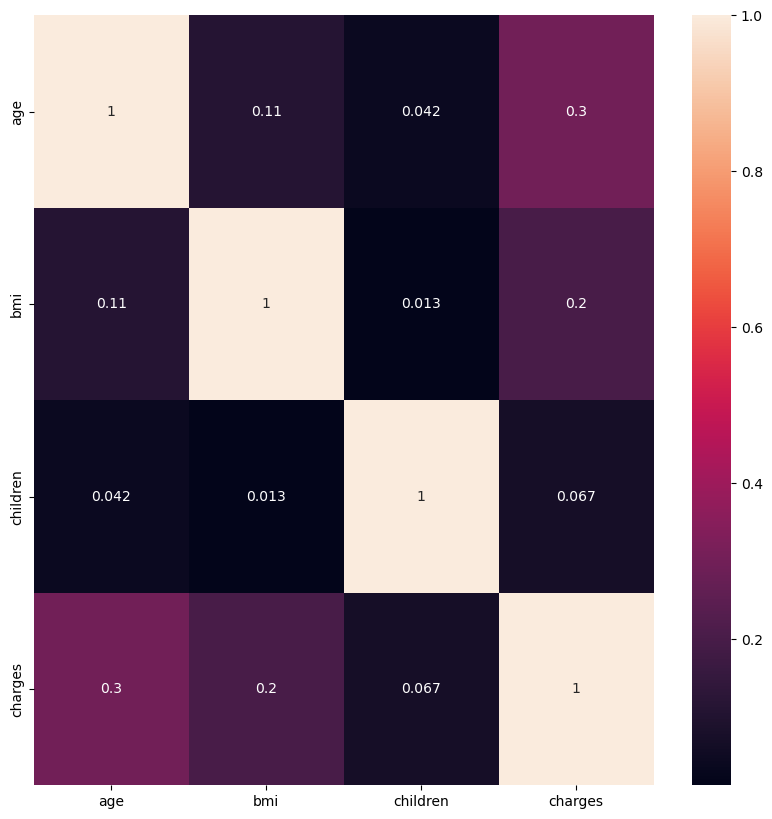

In [22]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(insurance_sub.corr(), annot = True, ax = ax)

# Q3 Discussion

Age and insurance charges exhibit a moderate positive correlation of 0.3, suggesting that charges tend to increase with age, although other factors also play a role in determining insurance costs. BMI is positively correlated with insurance charges at 0.2, indicating that higher BMI may lead to increased charges, reflecting the potential for higher health risks. However, the number of children has a very weak positive correlation with charges (0.067), implying that the influence of dependents on insurance charges is minimal and likely overshadowed by other variables not captured in this analysis. Overall, while age and BMI show some predictive power for insurance charges, the impact of the number of children is negligible.

# Q4 Creating a Scatterplot

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

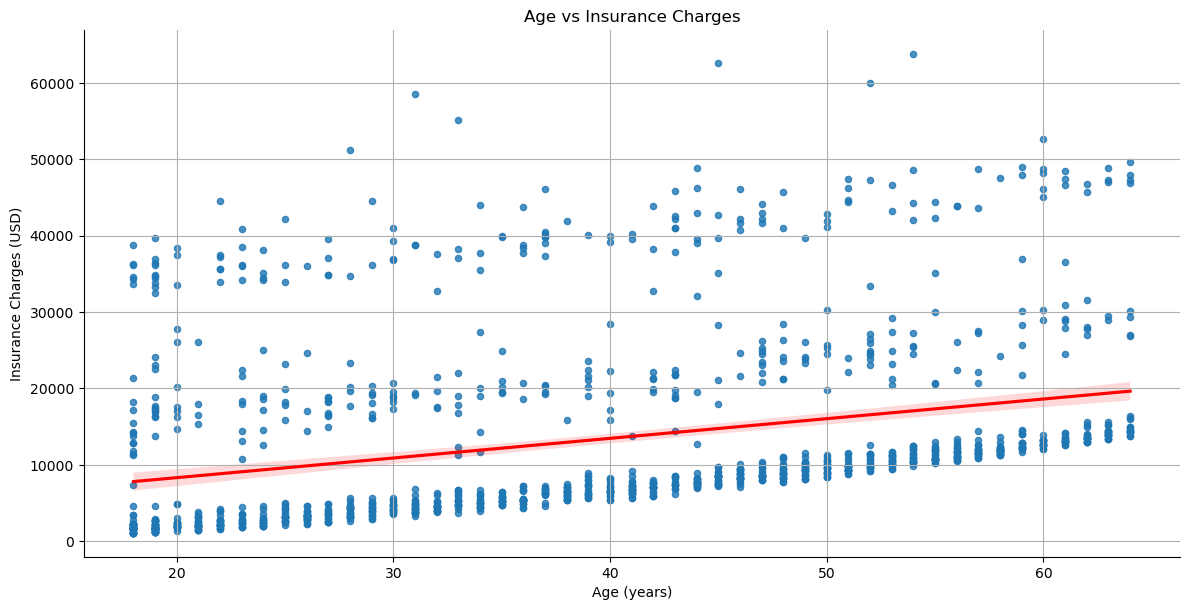

In [26]:
plt.figure(figsize=(10, 6))  # Increase figure size
sns.lmplot(x='age', y='charges', data=df_insurance_checked, aspect=2, height=6, scatter_kws={'s': 20}, line_kws={'color': 'red'})  # Adjust marker size and add a regression line
plt.title('Age vs Insurance Charges')  # Add a title
plt.xlabel('Age (years)')  # Label x-axis
plt.ylabel('Insurance Charges (USD)')  # Label y-axis
plt.grid(True)  # Add gridlines

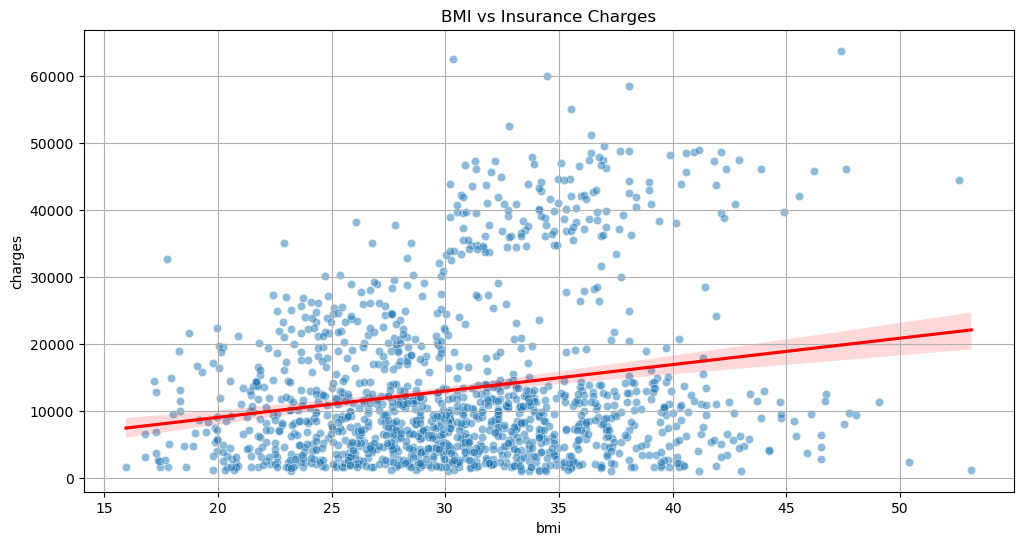

In [30]:
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.scatterplot(data=df_insurance_checked, x='bmi', y='charges', alpha=0.5)  # Adjust transparency with alpha
plt.title('BMI vs Insurance Charges')  # Add a title for context
plt.xlabel('Body Mass Index (BMI)')  # Label the x-axis
plt.ylabel('Insurance Charges')  # Label the y-axis
plt.grid(True)  # Include gridlines for better readability of the plot
sns.regplot(data=df_insurance_checked, x='bmi', y='charges', scatter=False, color='red')  # Overlay a regression line
plt.show()  # Display the plot


# Q4 Discussion

In the graphs depicting 'Age vs Insurance Charges' and 'BMI vs Insurance Charges', a positive relationship is observed in both, with insurance charges tending to increase with higher age and BMI. The spread of charges, particularly for age, widens with advancing age, indicating greater variability in charges among older individuals. Both graphs show clusters of higher charges, suggesting the influence of additional factors, such as smoking status or pre-existing conditions, that are not directly represented in the scatterplots. The consistent spread across BMI values and the notable clusters at higher charge levels in both graphs underscore the complexity of insurance charge determinants and the potential need for multivariate analysis to fully understand these relationships.

# Q6 Creating Pair Plot

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

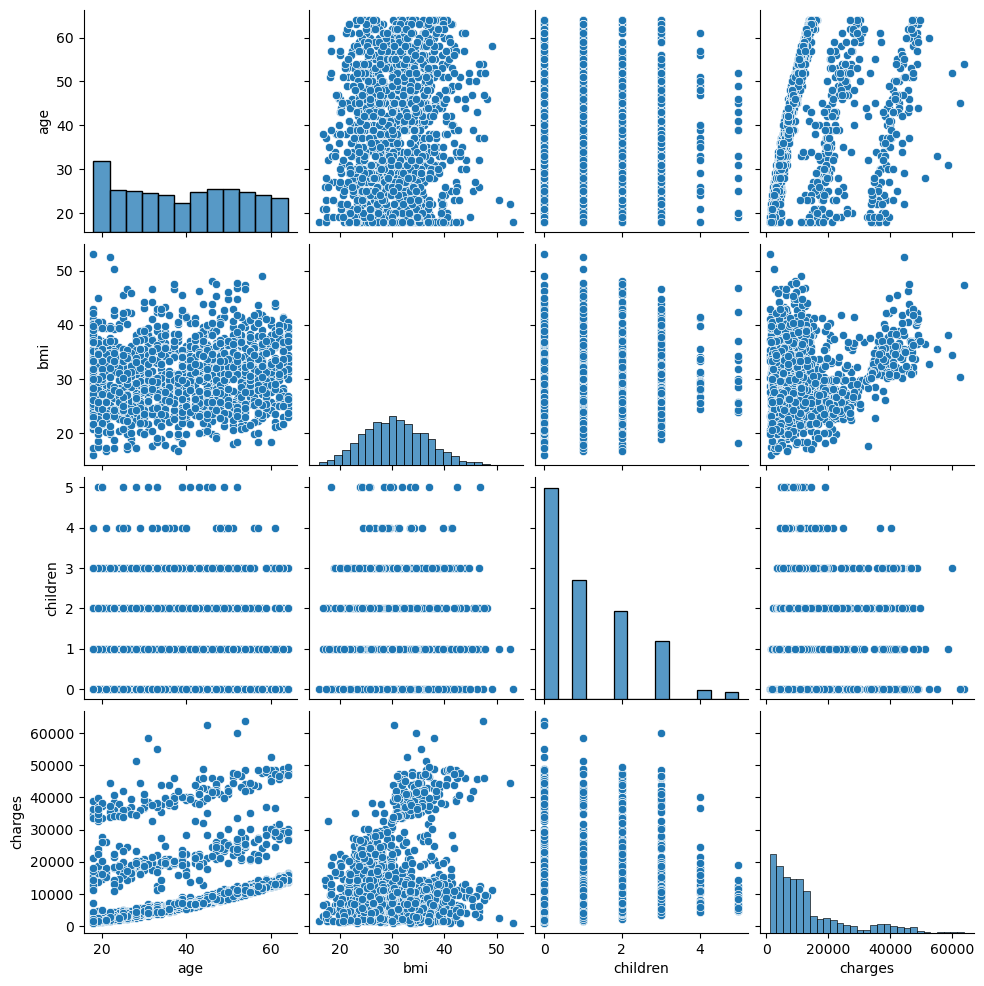

In [32]:
# Creating a pairplot
pair_plot = sns.pairplot(insurance_sub)

# Q5 Discussion

The pair plot shows that the distribution of ages is uniform, the distribution of BMI is normal, and the distribution of insurance costs is right-skewed, meaning that most people pay lower rates and there are fewer occurrences of very high rates. There is a bias in the number of children born to families with less dependents. Charges rise with age and BMI, however they vary a lot, indicating the presence of other factors. The distributions and scatterplots indicate that a more thorough examination of insurance charges is required, with special attention to their relationship to age and BMI and the potential impact of family size on healthcare expenses. These revelations may prove crucial for insurers in evaluating risks and creating policies, as well as policyholders in comprehending the factors that influence their insurance costs.

# Q6 Creating Categorical Plot

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

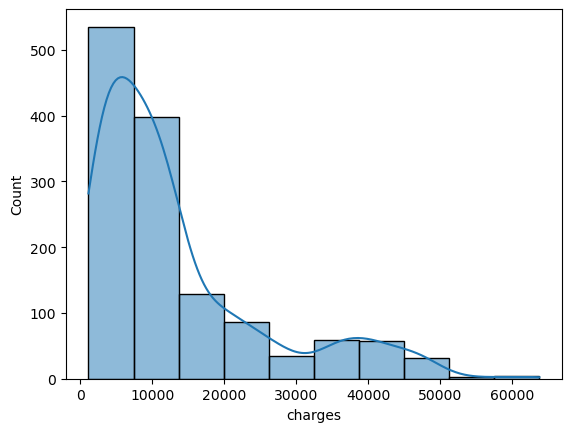

In [33]:
# Creating a histogram to see distribution
sns.histplot(df_insurance_checked['charges'], bins = 10, kde = True)

In [36]:
# Creating score category for categorical plot
df_insurance_checked.loc[df_insurance_checked['charges'] < 25000 , 'Charges category'] = 'Low Charges'

In [37]:
df_insurance_checked.loc[(df_insurance_checked['charges'] >= 25000) & (df_insurance_checked['charges'] < 35000 ), 'Charges category'] = 'Middle Charges'

In [38]:
df_insurance_checked.loc[df_insurance_checked['charges'] < 35000 , 'Charges category'] = 'High Charges'

In [39]:
df_insurance_checked['Charges category'].value_counts(dropna = False)

Charges category
High Charges    1204
nan              133
Name: count, dtype: int64

In [40]:
bins = [0, 25000, 35000, float('inf')]
labels = ['Low Charges', 'Medium Charges', 'High Charges']
df_insurance_checked['Charges category'] = pd.cut(df_insurance_checked['charges'], bins=bins, labels=labels)


In [41]:
df_insurance_checked['Charges category'].value_counts(dropna = False)

Charges category
Low Charges       1136
High Charges       133
Medium Charges      68
Name: count, dtype: int64

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([], [])

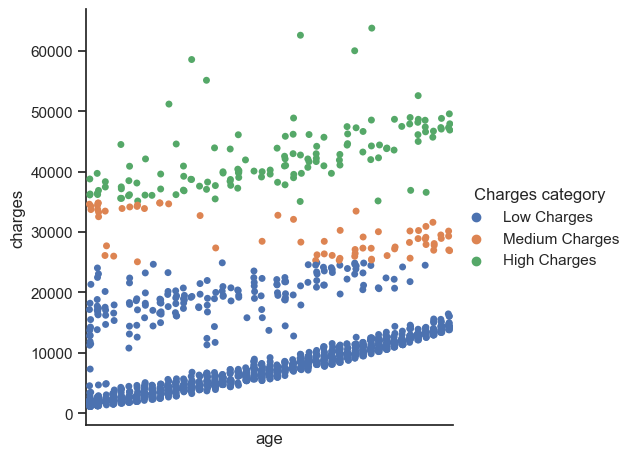

In [44]:
# Creating categorical plot with GDP per Capita
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='age', y='charges', hue="Charges category", data=df_insurance_checked)
plt.xticks([])

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([], [])

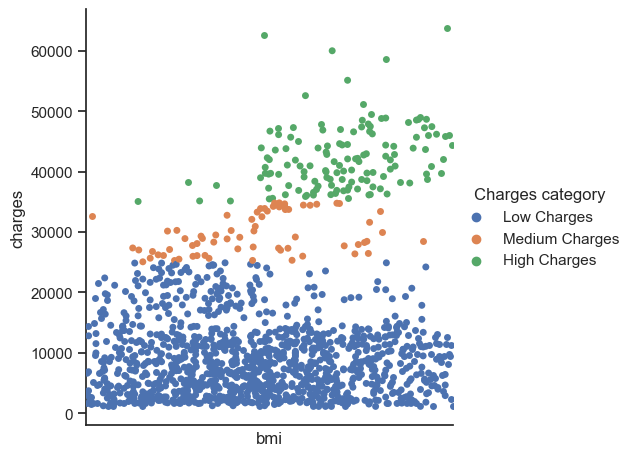

In [45]:
# Creating categorical plot with GDP per Capita
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='bmi', y='charges', hue="Charges category", data=df_insurance_checked)
plt.xticks([])

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([], [])

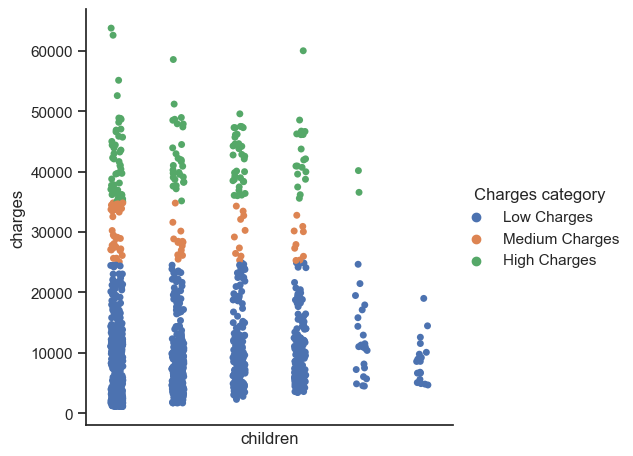

In [46]:
# Creating categorical plot with GDP per Capita
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='children', y='charges', hue="Charges category", data=df_insurance_checked)
plt.xticks([])

# Q6 Discussions

Age vs Insurance Charges:
- The plot illustrates an upward trend of insurance charges with age, affirming the assumption that health-related expenses increase as individuals age. The distinction between charge categories is apparent, with older age groups more likely to incur higher charges, highlighting age as a key factor influencing insurance costs.

BMI vs Insurance Charges:
- The BMI versus insurance charges scatter plot displays a positive correlation, suggesting that higher BMI may be associated with increased insurance premiums. While not absolute, the trend indicates that BMI is a contributing factor to insurance costs, with those at higher BMI levels more frequently falling into the 'Medium' and 'High Charges' categories.

Children vs Insurance Charges:
- The relationship between the number of children and insurance charges does not depict a clear trend. People with various numbers of children fall across all charge categories, indicating that the number of dependents alone is not a decisive factor in insurance charge levels, and other variables might play a more significant role.

# Q7 and Q8 Discussion

Please See attached PDF for Answers